In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [4]:
path = "1950.gexf"
G = nx.read_gexf(path)

# Connectedness: is network connected or are there loose nodes?
nx.is_connected(G)

False

In [10]:
# Generate connected components and select the largest:
largest_component = max(nx.connected_components(G), key=len)

# Create a subgraph of G consisting only of this component:
G2 = G.subgraph(largest_component)

nx.is_connected(G2)

True

In [5]:
# Average centrality
dc=nx.degree_centrality(G)
sum(dc.values()) / float(len(dc))

0.13675199262531879

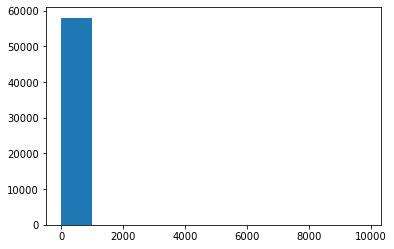

In [7]:
# degree distribution
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(G)

Text(0, 0.5, 'Frequency')

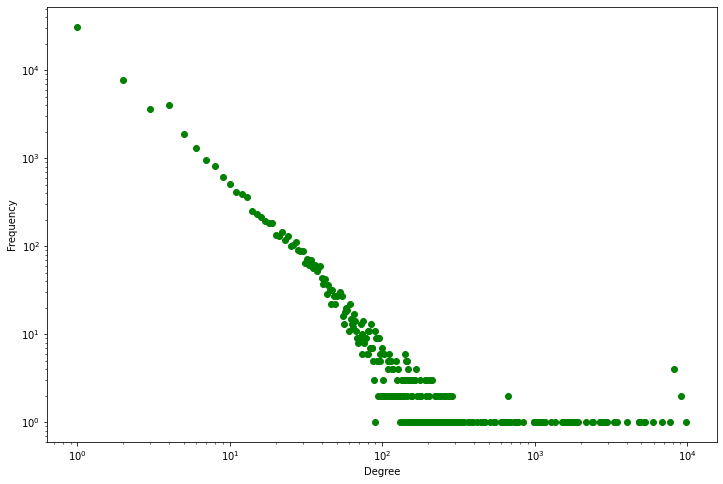

In [8]:
# degree distribution (loglog)
degree_freq = nx.degree_histogram(G)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq,'go') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

In [10]:
# global clustering coefficient
clust_coef = nx.average_clustering(G)
print(clust_coef)

0.0


In [12]:
# assortativity measures
assort1 = nx.degree_assortativity_coefficient(G)
#assort2 = nx.degree_pearson_correlation_coefficient(G2)
print(assort1)

-0.41699316694241095


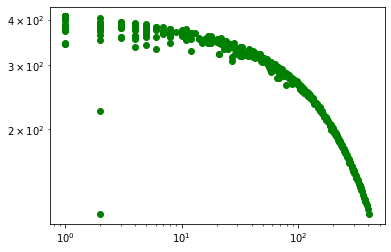

In [6]:
degrees = [val for (node, val) in G.degree()]
neighbours = list(nx.average_neighbor_degree(G).values())


plt.loglog(degrees, neighbours, 'go')
plt.show()


In [28]:
# Generate connected components and select the largest:
largest_component = max(nx.connected_components(G), key=len)

# Create a subgraph of G consisting only of this component:
G2 = G.subgraph(largest_component)

In [29]:
nx.average_shortest_path_length(G2)

1.898666074503479

In [30]:
#robustness
print(
    nx.node_connectivity(G2),
    nx.edge_connectivity(G2),
    nx.minimum_node_cut(G2),
    nx.minimum_edge_cut(G2))

KeyboardInterrupt: 

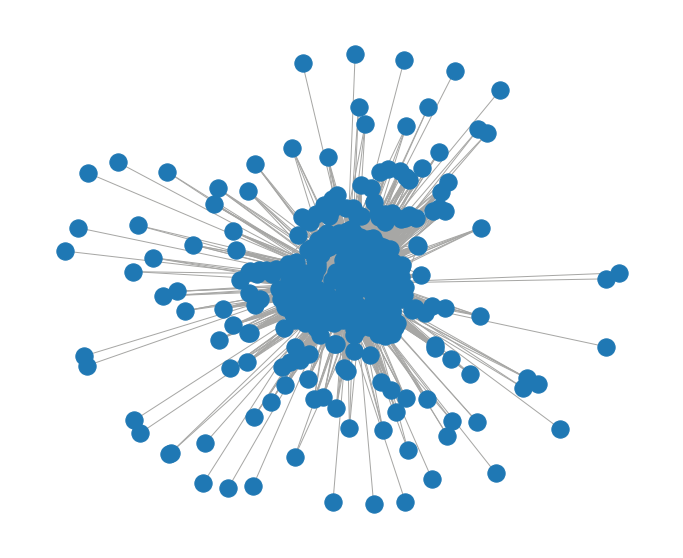

In [16]:
with sns.axes_style('darkgrid'):
 
 fig = plt.subplots(1, figsize=(12,10))
 
 nx.draw_networkx(G, edge_color='#a7a7a5', with_labels=False, font_color='white')
 
 plt.axis('off')

In [7]:
from networkx.algorithms.community import louvain_communities, greedy_modularity_communities

In [8]:
communities = louvain_communities(G)
print(len(communities))

137


In [9]:
for community in communities:
        print(len(community))

306
156
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [10]:
communities[0]

{'across',
 'age',
 'ah',
 'almost',
 'anything',
 'art',
 'away',
 'baby',
 'back',
 'bag',
 'ball',
 'beat',
 'beautiful',
 'bed',
 'bell',
 'bit',
 'bitch',
 'blood',
 'blow',
 'blue',
 'book',
 'brain',
 'breath',
 'bright',
 'build',
 'burn',
 'business',
 'buy',
 'call',
 'car',
 'carry',
 'case',
 'certain',
 'chance',
 'check',
 'city',
 'clear',
 'cold',
 'cool',
 'corner',
 'could',
 'count',
 'country',
 'couple',
 'course',
 'cross',
 'cut',
 'dance',
 'dark',
 'darling',
 'day',
 'deal',
 'dear',
 'different',
 'dog',
 'doubt',
 'draw',
 'dress',
 'drink',
 'drive',
 'ear',
 'earth',
 'easy',
 'eat',
 'either',
 'even',
 'every',
 'everybody',
 'exist',
 'eye',
 'fact',
 'fair',
 'family',
 'fast',
 'fear',
 'feeling',
 'fell',
 'felt',
 'fight',
 'figure',
 'fill',
 'find',
 'fine',
 'finger',
 'first',
 'fit',
 'five',
 'floor',
 'flow',
 'follow',
 'fool',
 'force',
 'forget',
 'form',
 'four',
 'front',
 'fuck',
 'future',
 'game',
 'give',
 'gold',
 'good',
 'green',


In [62]:
color_map = []
for node in G:
    if node in communities[0]:
        color_map.append('blue')
    elif node in communities[1]:
        color_map.append('green')
    elif node in communities[2]:  
        color_map.append('red')
    else:
        color_map.append('pink')

In [63]:
print(len(G.nodes),
len(color_map))

597 597


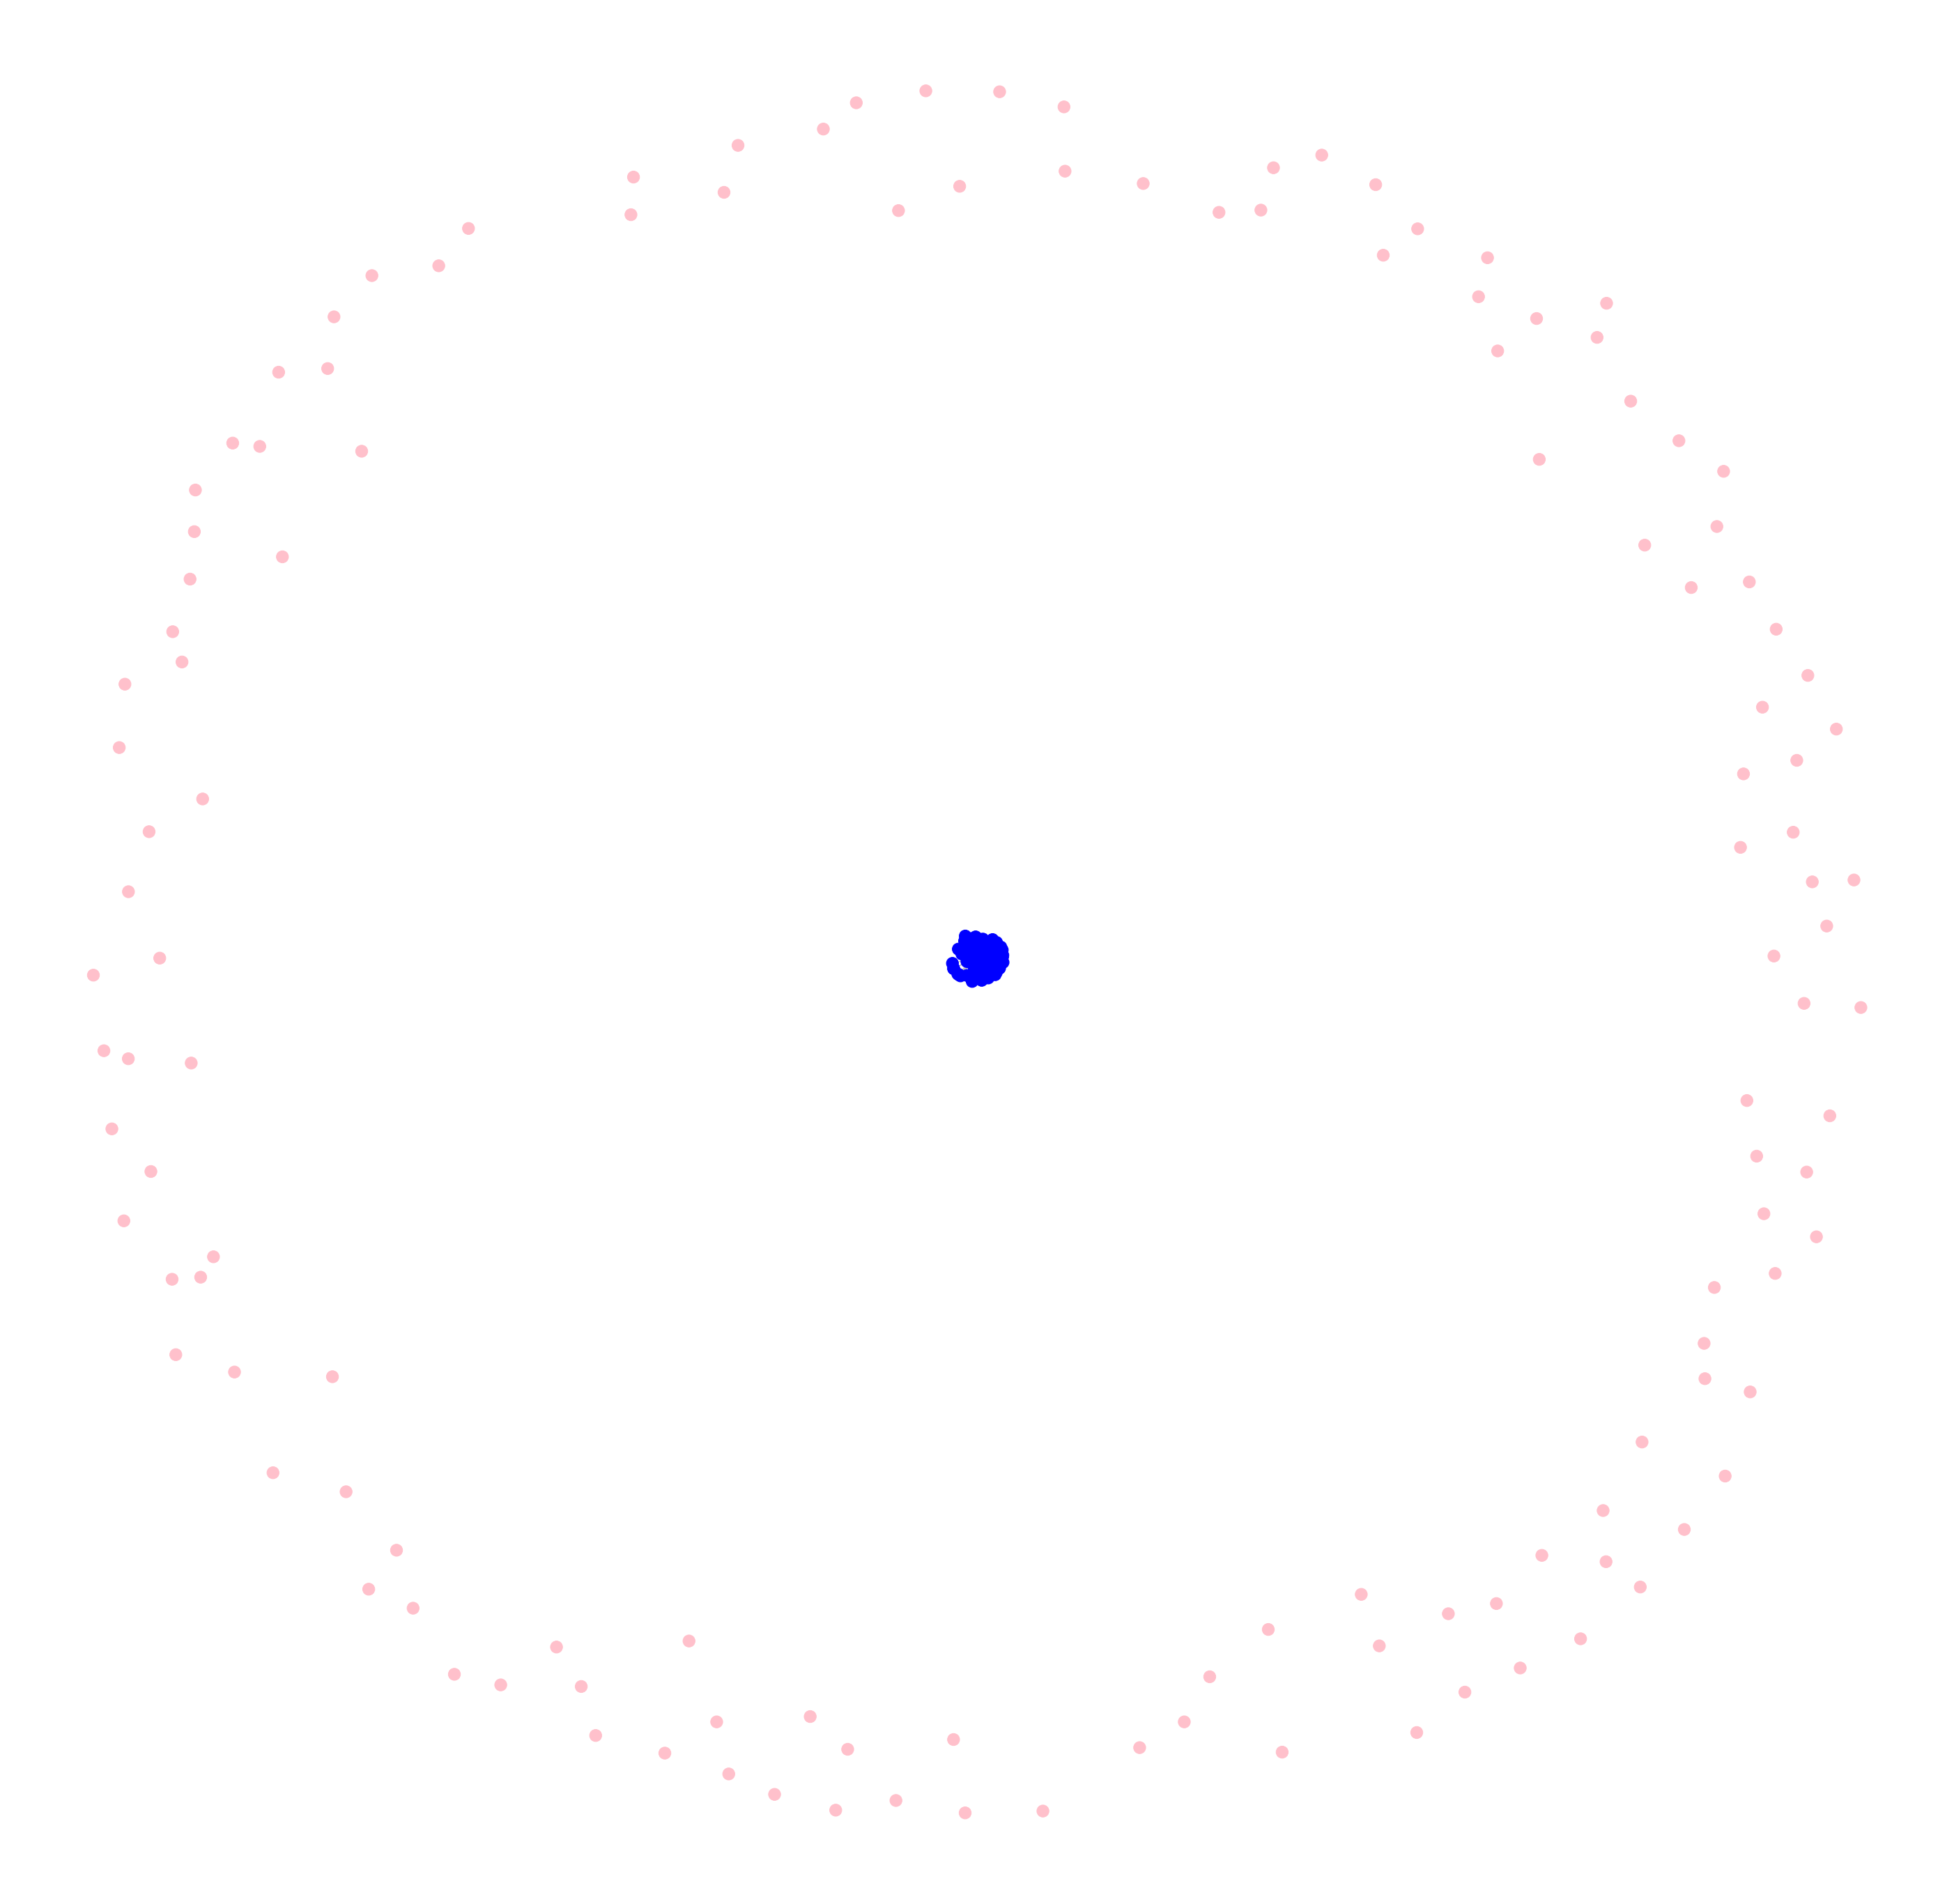

In [67]:
with sns.axes_style('darkgrid'):
    fig = plt.subplots(1, figsize=(50,50))
 
    nx.draw_networkx(G, node_color = color_map, edge_color='#a7a7a5', with_labels=False, font_color='white')
 
    plt.axis('off')

In [18]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [19]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

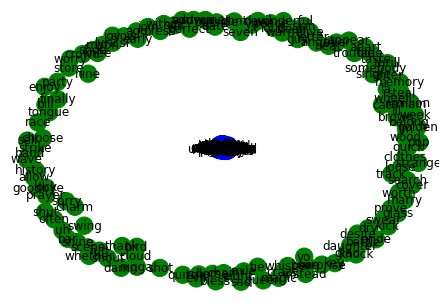

In [21]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()

- how does the network evolve over time
- which big nodes come and go

- network analytics: degree distribution (scale invariance & centrality), connectedness, clustering coefficient, degree correlation/assertativity

- clustering (also looking at modularity)

- robustness (deliberately taking away hubs)

(- link prediction: predict and check with graph of next decade)